In [1]:
import warnings
warnings.filterwarnings("ignore")
#for handling RAM
import gc 

#stats
from statsmodels.stats.anova import AnovaRM
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
#import pingouin as pg
from matplotlib.colors import LinearSegmentedColormap


#my to go packages
import math
import random
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from matplotlib import cm
import matplotlib.ticker as ticker


#for readin
import glob # Package for Unix-style pathname pattern expansion
import os   # Python operating system interface

#for signal processing
from scipy.interpolate import CubicSpline,interp1d
import scipy.signal as signal
import scipy.stats as stats
from scipy.signal import filtfilt, butter
from scipy.fft import rfft, rfftfreq
from scipy.stats import sem 
from scipy.stats import norm
from scipy.stats import ttest_rel
from scipy.optimize import curve_fit,minimize

#other packages
import ast
import itertools
from itertools import groupby
from more_itertools import consecutive_groups
import more_itertools as mit
from operator import itemgetter
import statistics
from sklearn.mixture import GaussianMixture

import pickle

import matplotlib.ticker as ticker
import cv2


In [2]:
def fs(width,height):#setting plot size
    plt.rcParams['figure.figsize'] = (width,height)

In [3]:
task = 'precue'
if task == 'retrocue':
    gazePath = glob.glob('Z:/yueying/gazeObject_YueyingDong/results/data/gazeClean/*.csv')[-1:]
    psyPath = [glob.glob('Z:/yueying/gazeObject_YueyingDong/results/data/psychopy/*36*.csv')[0]]
else:
    gazePath = glob.glob('Z:/yueying/gazeObject_YueyingDong/results/data/gazeClean/*.csv')[:-1]
    psyPath = [glob.glob('Z:/yueying/gazeObject_YueyingDong/results/data/psychopy/*31*.csv')[0],glob.glob('Z:/yueying/gazeObject_YueyingDong/results/data/psychopy/*35*.csv')[0]]

In [4]:
trlInfo = pd.DataFrame()
gazeClean = pd.DataFrame()

if input('ran processing code? y/n') == 'y':
    
    for i in gazePath:
        gazeClean = pd.concat([gazeClean,pd.read_csv(i).iloc[:,np.r_[0,1,2:6002]]],axis = 0)

    for i in psyPath:
        trlInfo = pd.concat([trlInfo,pd.read_csv(i)[['participant','TRIALID','stimImage','trlType']]],axis = 0)
        trlInfo['stimImage'] = [i.split('/')[-1] for i in trlInfo.stimImage]

    gazeClean = gazeClean.merge(trlInfo,how = 'left',on ='TRIALID',)

    #select the useful indicies
    temp = pd.concat((gazeClean.iloc[:,[0,1]],gazeClean.iloc[:,2:-3:10]),axis = 1)
    gazeClean = pd.concat((temp,gazeClean.iloc[:,[-3,-2,-1]]),axis = 1)
else:
    print('no processing required. Ran following cells for result visualizations')

no processing required. Ran following cells for result visualizations


In [5]:
gazeClean.shape[0]/2,320*41, int(gazeClean.shape[0]/2)/(320*41)

(0.0, 13120, 0.0)

In [6]:
gazeClean.shape[0]/2,320*42

(0.0, 13440)

In [89]:
int(gazeClean.shape[0]/2)/(320*42)

0.9131696428571429

# readin variables

# RSA

In [8]:
def allCorr(tagsMean,subj,included = 600,corrType = 'default',**kwargs,):
    
    if corrType == 'default':
        allArr = np.zeros((6,included))
        allArr[0] = [tagsMean.loc['verbal','verbal'].iloc[:,k].corr(tagsMean.loc['verbal','verbal'].mRDV_visual)for k in range(included)]
        allArr[1]  = [tagsMean.loc['verbal','visual'].iloc[:,k].corr(tagsMean.loc['verbal','visual'].mRDV_visual)for k in range(included)]
        allArr[2]  = [tagsMean.loc['visual','visual'].iloc[:,k].corr(tagsMean.loc['visual','visual'].mRDV_visual)for k in range(included)]

        allArr[3]  = [tagsMean.loc['verbal','verbal'].iloc[:,k].corr(tagsMean.loc['verbal','verbal'].mRDV_verbal)for k in range(included)]
        allArr[4] = [tagsMean.loc['verbal','visual'].iloc[:,k].corr(tagsMean.loc['verbal','visual'].mRDV_verbal)for k in range(included)]
        allArr[5] = [tagsMean.loc['visual','visual'].iloc[:,k].corr(tagsMean.loc['visual','visual'].mRDV_verbal)for k in range(included)]

        outDf = pd.DataFrame(allArr)
        outDf['mRDV'] = ['visual'] * 3 + ['verbal']*3
        outDf['current'] = ['verbal','verbal','visual'] *2
        outDf['target'] = ['verbal','visual','visual'] *2
        outDf['subj'] = subj
    else:
        allArr = np.zeros((3,included))
    
        allArr[0] = [tagsMean.loc['verbal','verbal'].iloc[:,k].corr(tagsMean.loc['verbal','verbal'][corrType])for k in range(included)]
        allArr[1]  = [tagsMean.loc['verbal','visual'].iloc[:,k].corr(tagsMean.loc['verbal','visual'][corrType])for k in range(included)]
        allArr[2]  = [tagsMean.loc['visual','visual'].iloc[:,k].corr(tagsMean.loc['visual','visual'][corrType])for k in range(included)]
        
        outDf = pd.DataFrame(allArr)
        outDf['mRDV'] = corrType
        outDf['current'] = ['verbal','verbal','visual'] 
        outDf['target'] = ['verbal','visual','visual'] 
        outDf['subj'] = subj

    return outDf

In [15]:
import matplotlib.ticker as ticker


In [17]:
allFiles = [
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.1.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.10.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.14.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.17.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.20.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.24.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.27.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.30.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.34.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.37.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.4.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.40.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_features.7.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_classifiers.0.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_classifiers.3.npy',
            'Z:/yueying/vgg16_it_v2/vgg16_16Layers\\corr_vgg-16_classifiers.6.npy',]

mRDVs_corrLabel = [f'conv2d_layer{i}' for i in [0,3,7,10,14,17,20,24,27,30,34,37,40]] + ['FC_layer0','FC_layer3','FC_layer6']
mRDVs = [f'mRDV_{i}' for i in range(16)]

In [18]:
runAllLayers = True
runCorr = False

task = '360to400'#'311to352' 
downsample = True
all16Layers = False
all47Layers = True #for the across layer correlation, whether to use 11 layers, or 47 layers

In [349]:
dsCorr = pd.DataFrame()
dataN = 600
if downsample:
    dsFreq = 10
else:
    dsFreq = 1
howMuchToInclude = int(dataN/dsFreq)
if runCorr:
    for thisFile in glob.glob(f'Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/meanEuc/{task}/*.csv')[:1]:
        print(thisFile)
        tagsMean = pd.read_csv(thisFile)
        t = tagsMean[['mRDV_visual','mRDV_verbal','subj']]
        thisSubj = t.subj.values[0]
        
        tagsMean = pd.concat([tagsMean[['trlType_current','trlType_target','stimImage_current',
            'stimImage_target',
            ]],tagsMean.iloc[:,4:dataN+4].groupby(np.arange(dataN)//dsFreq,axis =1).mean(numeric_only = True) ],axis =1)

        for n,i in enumerate(allFiles):
            thisLayerVal = pd.DataFrame(np.load(i),index=imIDArr,columns=imIDArr)
            tagsMean[f'mRDV_{n}'] = [1 - thisLayerVal.loc[curr,tar] for curr,tar in zip(tagsMean.stimImage_current,tagsMean.stimImage_target)]
        if runAllLayers:
            tagsMean = tagsMean.set_index(['trlType_current','trlType_target','stimImage_current','stimImage_target'])
            for thisMRDV in mRDVs:
                dsCorr = pd.concat([dsCorr,allCorr(tagsMean,included=howMuchToInclude,subj = thisSubj,corrType = thisMRDV)],axis = 0)
        else:
            tagsMean = pd.concat([tagsMean,t],axis =1)
            tagsMean = tagsMean.groupby(['trlType_current','trlType_target','stimImage_current','stimImage_target',]).mean(numeric_only=True)
            dsCorr = pd.concat([dsCorr,allCorr(tagsMean,included=howMuchToInclude,subj = thisSubj)],axis = 0)
    if runAllLayers:
        dsCorr['mRDV'] = [i.split('_')[0] + '_0' + i.split('_')[1] if int(i.split('_')[1]) < 10 else i for i in dsCorr.mRDV]
else:
    dsCorr_retrocue = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal\\corrVal_360to400_ds.csv').iloc[:,1:]
    dsCorr_precue = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal\\corrVal_311to352_ds.csv').iloc[:,1:]

    if all47Layers:
        dsCorr_precue_allLayer = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_311to352_allLayers47_ds.csv').iloc[:,1:]
        dsCorr_retrocue_allLayer = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_360to400_allLayers47_ds.csv').iloc[:,1:]
    elif all16Layers:
        dsCorr_precue_allLayer = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_311to352_16Layers_ds.csv').iloc[:,1:]
        dsCorr_retrocue_allLayer = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_360to400_16Layers_ds.csv').iloc[:,1:]
    else:
        dsCorr_precue_allLayer = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_311to352_allLayers_ds.csv').iloc[:,1:]
        dsCorr_retrocue_allLayer = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_360to400_allLayers_ds.csv').iloc[:,1:]

In [22]:
jjj = pd.read_csv(glob.glob(f'Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/meanEuc/{task}/*.csv')[0])

In [351]:
cmap = plt.cm.get_cmap('viridis')
cmap2 = plt.cm.get_cmap('inferno')
retrocueT = np.array([0.5,1.5,2,2.5,3,6])
precueT = np.array([0.5,1.5,2.5,3,6])
layerN = dsCorr_precue_allLayer.mRDV.nunique()

In [353]:
qqq = np.array(['Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.6.npy',
'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.13.npy',
'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.23.npy',
'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.33.npy',
'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.43.npy',
'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.0.npy',
'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.3.npy',
'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.6.npy',])

In [354]:
allNames =  ['Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.4.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.5.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.6.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.7.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.8.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.9.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.10.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.11.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.12.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.13.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.14.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.15.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.16.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.17.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.18.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.19.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.20.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.21.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.22.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.23.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.24.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.25.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.26.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.27.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.28.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.29.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.30.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.31.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.32.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.33.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.34.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.35.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.36.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.37.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.38.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.39.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.40.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.41.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.42.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_features.43.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.0.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.1.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.2.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.3.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.4.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.5.npy',
            'Z:/yueying/vgg16_it_v2/corr/vgg16\\corr_vgg-16_classifiers.6.npy',]
ind = [np.where(np.array(allNames) == i)[0][0] for i in qqq]

In [355]:
layerLabels = ['max pooling layer 1', 'max pooling layer 2','max pooling layer 3',
'max pooling layer 4','max pooling layer 5', 
'fully connected layer 1','fully connected layer 2','fully connected layer 3']

In [356]:
layerLabels = ['MP 1', 'MP 2','MP 3',
'MP 4','MP 5', 
'FC 1','FC 2','FC 3']

In [357]:
layerN = 8

In [358]:
cmap = plt.cm.get_cmap('viridis')


In [359]:
plt.rcParams['font.family'] = 'arial'

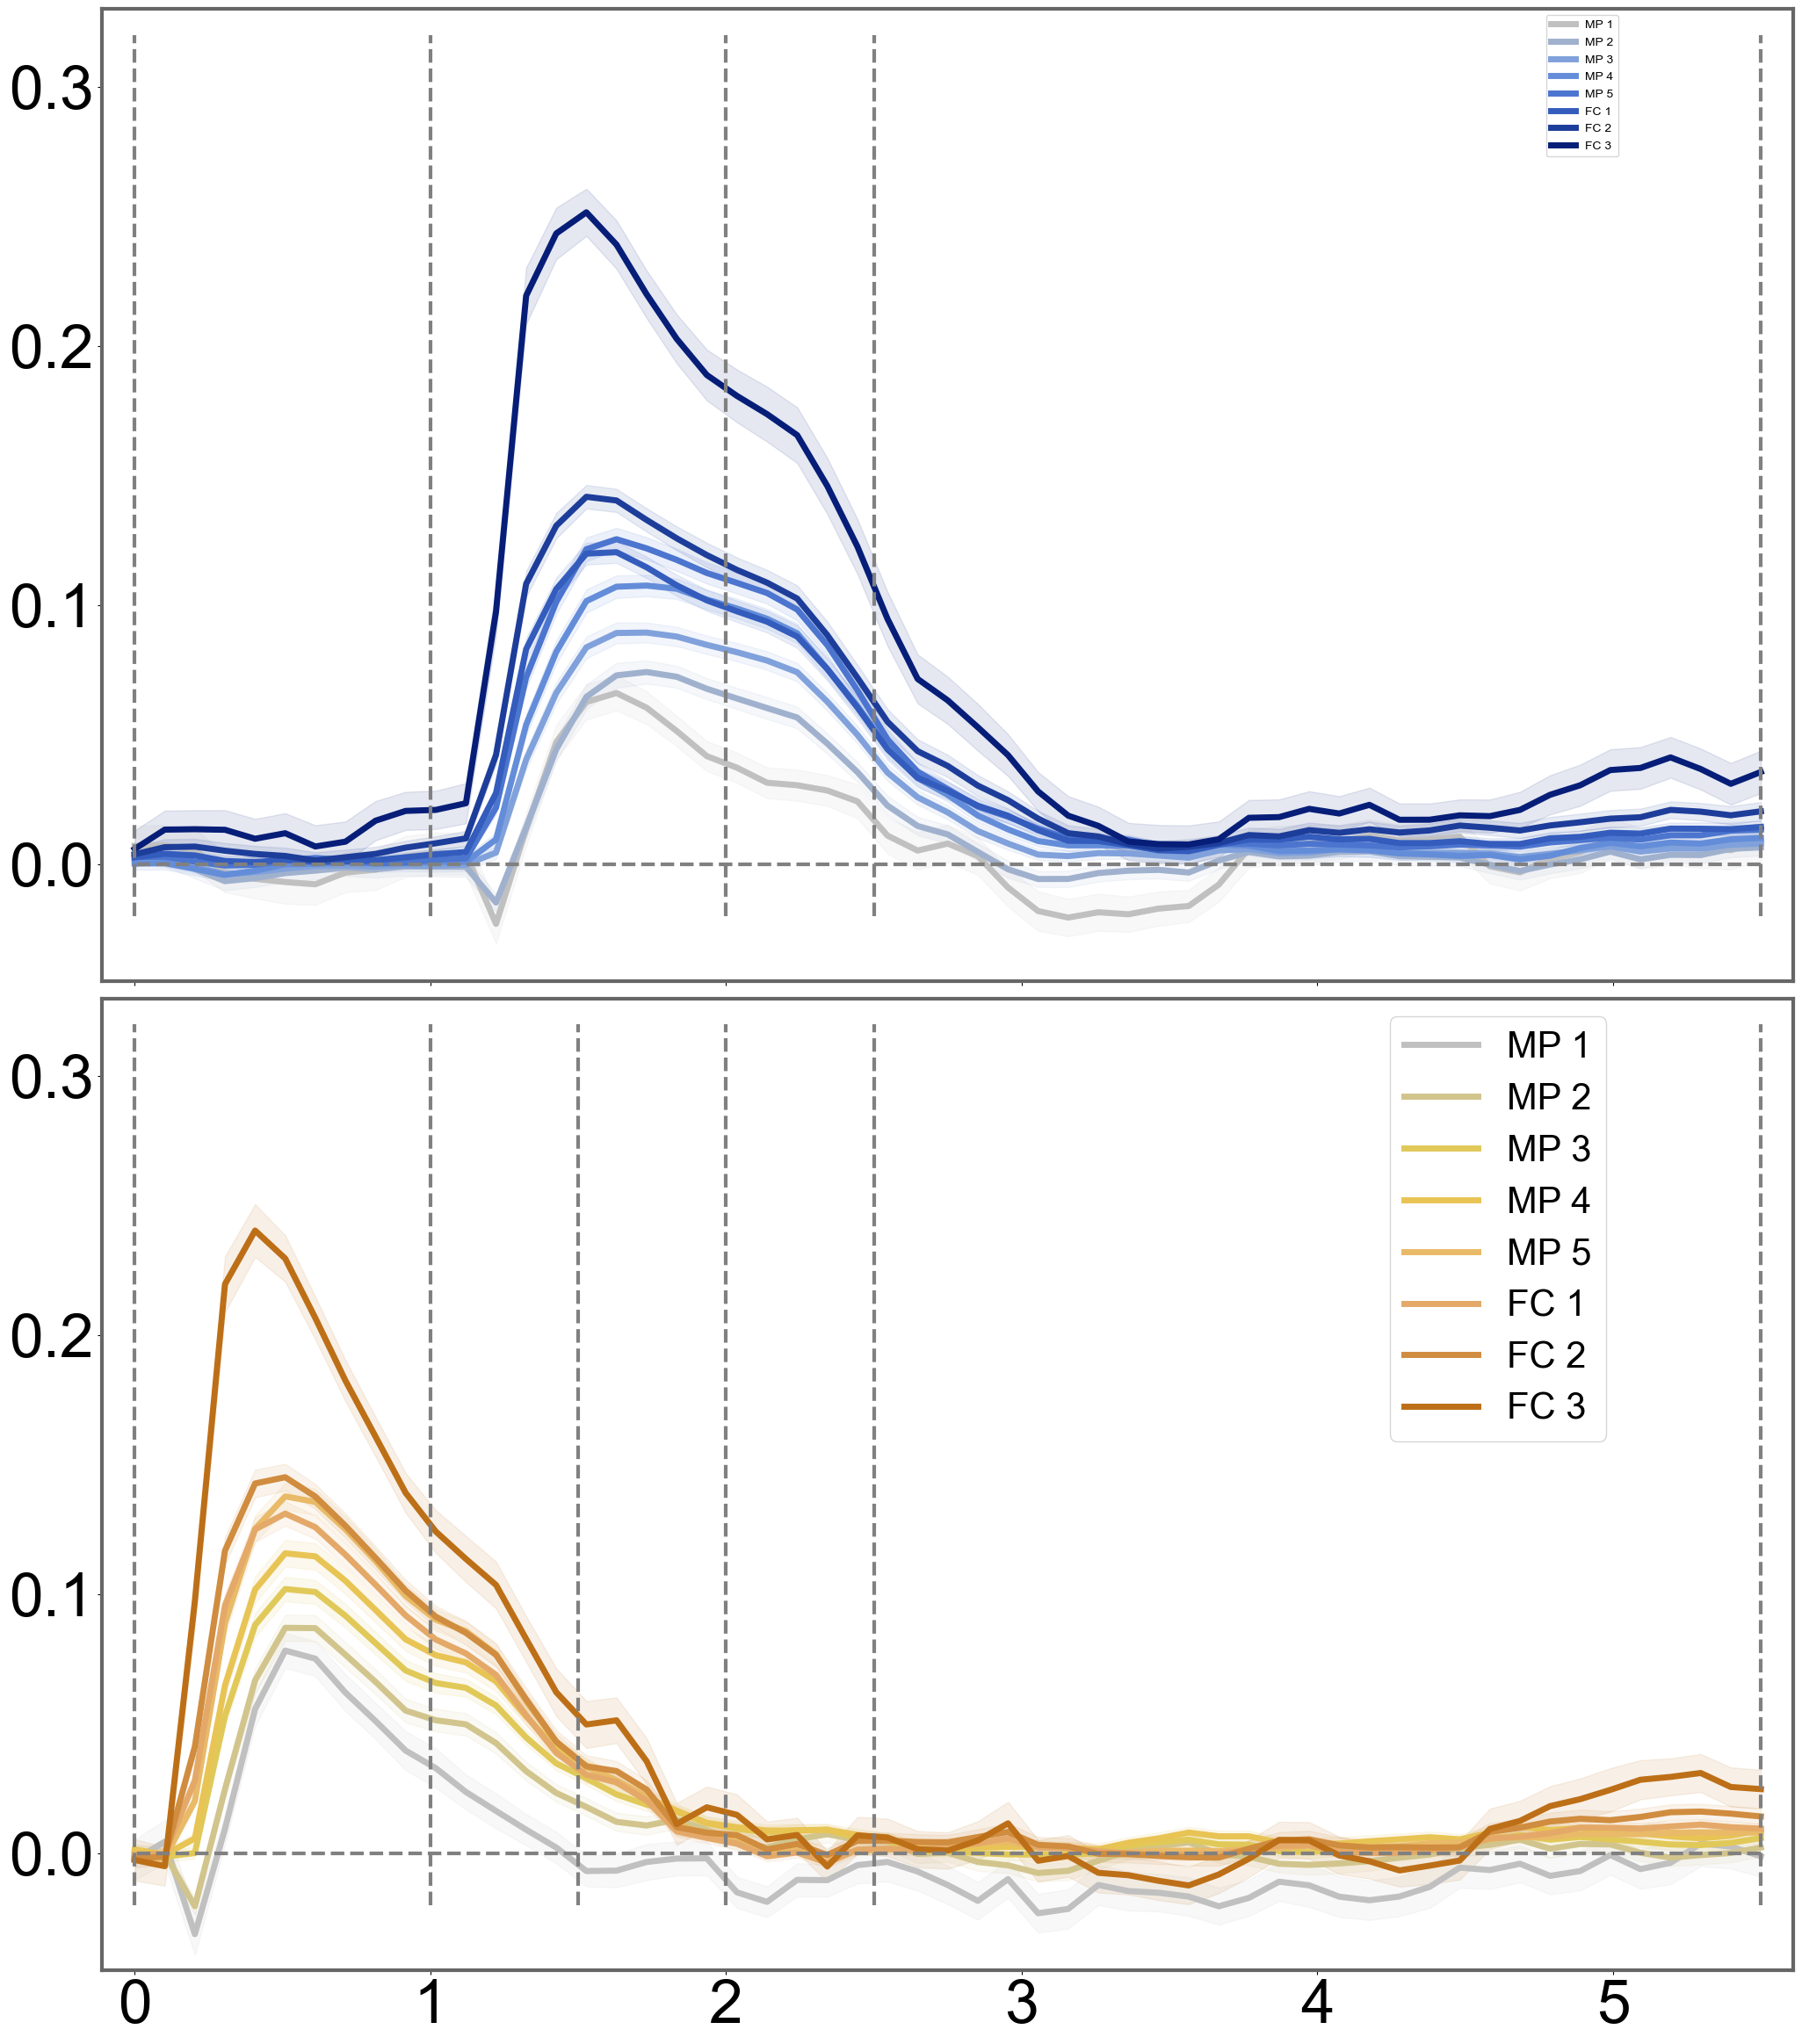

In [365]:
if runAllLayers:
        cm = LinearSegmentedColormap.from_list(
                        "Custom", ['silver','#759ce0','#3b66c8','#061e78'], N=8)
        cm2 = LinearSegmentedColormap.from_list(
                        "Custom", ['silver','#e7cb48','#eab375','#bd6f17'], N=8)
        dsCorrMean_precue = dsCorr_precue_allLayer.groupby(['mRDV',]).mean(numeric_only=True).reset_index(drop=True).loc[:,np.arange(60).astype(str)].iloc[ind,5:60]
        dsCorrSem_precue = dsCorr_precue_allLayer.groupby(['mRDV',]).sem(numeric_only=True).reset_index(drop=True).loc[:,np.arange(60).astype(str)].iloc[ind,5:60]

        dsCorrMean_retrocue = dsCorr_retrocue_allLayer.groupby(['mRDV']).mean(numeric_only=True).reset_index(drop=True).loc[:,np.arange(60).astype(str)].iloc[ind,5:60]
        dsCorrSem_retrocue = dsCorr_retrocue_allLayer.groupby(['mRDV']).sem(numeric_only=True).reset_index(drop=True).loc[:,np.arange(60).astype(str)].iloc[ind,5:60]
        xAxis = np.linspace(0,5.5,55)

        fig,ax = plt.subplots(nrows=2,figsize = (20,23),sharex=True,sharey=True)

        [ax[0].plot(xAxis,dsCorrMean_precue.iloc[i,:],linewidth = 5,label = layerLabels[i],
                color = cm(i)) for i in range (layerN) ]#label = mRDVs_corrLabel[i],
        ax[0].legend(bbox_to_anchor = [0.9,1])
        
        [ax[0].fill_between(xAxis,dsCorrMean_precue.iloc[i,:]+dsCorrSem_precue.iloc[i,:],dsCorrMean_precue.iloc[i,:]-dsCorrSem_precue.iloc[i,:],
                color = cm(i),alpha = 0.1) for i in range (layerN) ]#label = mRDVs_corrLabel[i],

        
        ax[0].vlines(precueT-0.5,-0.02,0.32,colors = 'grey',linestyles = 'dashed',linewidth = 3)
        plt.suptitle('')


        [ax[1].plot(xAxis,dsCorrMean_retrocue.iloc[i,:],linewidth = 5,label = layerLabels[i],
                color = cm2(i)) for i in range (layerN) ]
        
        ax[1].legend(fontsize = 30,bbox_to_anchor = (0.9,1))
        
        [ax[1].fill_between(xAxis,dsCorrMean_retrocue.iloc[i,:]+dsCorrSem_retrocue.iloc[i,:],dsCorrMean_retrocue.iloc[i,:]-dsCorrSem_retrocue.iloc[i,:],
                label = dsCorrMean_retrocue.index.values[i],color = cm2(i),alpha = 0.1) for i in range (layerN) ]
        ax[1].vlines(retrocueT-0.5,-0.02,0.32,colors = 'grey',linestyles = 'dashed',linewidth = 3)

        ax[0].set_title('')
        ax[1].set_title('')
        fig.tight_layout()

        ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.1))

        #ax[0].legend(fontsize = 30,bbox_to_anchor = (0.5,1))
        
        
        
        ax[0].set_ylim(-0.045,0.33)

        ax[0].tick_params(axis = 'y',labelsize=50)
        ax[0].tick_params(axis = 'x',labelsize=0)
        ax[1].tick_params(labelsize=50)
        ax[0].hlines(0,5.5,0,colors = 'grey',linestyles = 'dashed',linewidth = 3)
        ax[1].hlines(0,5.5,0,colors = 'grey',linestyles = 'dashed',linewidth = 3)


        ax[0].spines['left'].set_color('#666666')
        ax[0].spines['bottom'].set_color('#666666')
        ax[0].spines['right'].set_color('#666666')
        ax[0].spines['top'].set_color('#666666')
        ax[0].spines['left'].set_linewidth(3)
        ax[0].spines['bottom'].set_linewidth(3)
        ax[0].spines['right'].set_linewidth(3)
        ax[0].spines['top'].set_linewidth(3)

        ax[1].spines['left'].set_color('#666666')
        ax[1].spines['bottom'].set_color('#666666')
        ax[1].spines['right'].set_color('#666666')
        ax[1].spines['top'].set_color('#666666')
        ax[1].spines['left'].set_linewidth(3)
        ax[1].spines['bottom'].set_linewidth(3)
        ax[1].spines['right'].set_linewidth(3)
        ax[1].spines['top'].set_linewidth(3)

        ax[0]. margins(x=0.02)

## plot out the condition plot using only the last layer

In [218]:
labelArr = ['ver --> ver','ver --> vis','vis --> vis']
retrocueT = [0.5,1.5,2,2.5,3,6]
precueT = [0.5,1.5,2.5,3,6]
cList = ['purple','black','green']

In [219]:
dsCorrMean_retrocue = dsCorr_retrocue.groupby(['mRDV','current','target']).mean(numeric_only=True)
dsCorrSem_retrocue = dsCorr_retrocue.groupby(['mRDV','current','target']).sem(numeric_only=True)

dsCorrMean_precue = dsCorr_precue.groupby(['mRDV','current','target']).mean(numeric_only=True)
dsCorrSem_precue = dsCorr_precue.groupby(['mRDV','current','target']).sem(numeric_only=True)



# calculate permutation

## permutation to compare conditional difference

In [221]:
# permutation
import pingouin as pg

In [262]:
dataN = 60
perms = 5000
runRaw = False
fCluster = np.zeros(perms) # permutation iteration x data x f and p 

In [263]:
def consecutive(data, stepsize=10,
                findSame = False): # helper function for findGazeShift, deBlink, and more
    """
    @ data = row vector
    @ stepsize =  the larger the step size, the more difference it allows for two groups
                to be considered within the same cluster
    @ findSame = if True, find concecutive data point of the same value, this is set true
                 for finding blink counts using the blink mask (a df of 0 and 1 )
    """
    # this will split an array of numbers into many subarrays of consecutive numbers
    # the stepsize controls for how close of the two numbers for them to be considered
    # in the same cluster; e.g. [1,2,3,4,5,10] would be clustered together if stepsize = 5


    #data is the array of timepoint where the saccade velocity array crossed the threshold
    if findSame:
        stepsize = 0
        return np.split(data, np.where(abs(np.diff(data)) > stepsize)[0]+1)
    return np.split(data, np.where(np.diff(data) > stepsize)[0]+1)

In [264]:

corrDf_ds_retrocue = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_360to400_ds.csv').iloc[:,1:]
corrDf_ds_precue = pd.read_csv('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_311to352_ds.csv').iloc[:,1:]

In [265]:
semanticCorr = corrDf_ds_retrocue[corrDf_ds_retrocue.mRDV == 'verbal']
semanticCorr['comparison'] = semanticCorr.current + semanticCorr.target

In [266]:
dataN

60

In [267]:
if runRaw:
        for n in range(perms):
                print(n)
                try:
                        # shuffle condition label
                        semanticCorr['randLabel'] = np.random.permutation(semanticCorr.comparison.values)

                        # for each time point, 2 way anova with blk reliability and cued item as dv, and the data as dv
                        # get the f score for the interaction effect
                        fpThis = np.array([pg.rm_anova(data = semanticCorr, dv = i,subject='subj',
                        within = ['randLabel'],)[['F','p-unc']].iloc[0,:] for i in semanticCorr.columns[:dataN].values])
                        fArr = fpThis[:,0]
                        
                        # find the clusters that exceed p value threshold
                        consGroups = consecutive(np.where(fpThis[:,1] < 0.05)[0], stepsize=1,
                                        findSame = False)

                        # find the cluster with the largest length,then find its corresponding t values, sum it up
                                #note: if no cluster is found, this will return 0
                        fCluster[n] =  np.round(fArr[consGroups[np.argmax(np.array([len(t) for t in consGroups]))]].sum(),3)

                except :
                        print(f"⚠️ ZeroDivisionError encountered for {i}. Skipping.")

else:
        #for testing within condition

        """anova test"""
        k = [pg.rm_anova(data = semanticCorr, dv = i,subject='subj',
                within = ['comparison'],)[['F','p-unc']].iloc[0,:] for i in semanticCorr.columns[:dataN].values]
        fCluster = np.load('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/fCluster_retrocue_rmAnova.npy')
        

(0.0, 300.0)

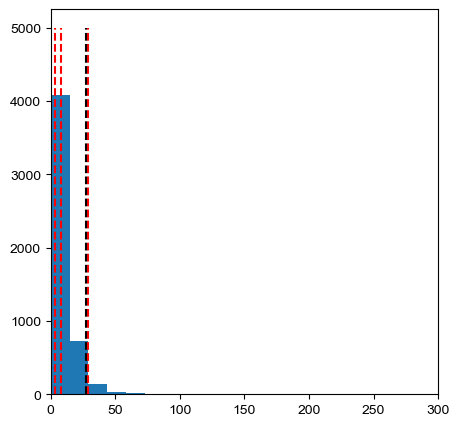

In [268]:
fs(5,5)
realF = np.array(k)[:,0]
realP = np.array(k)[:,1]

consGroups_retrocueCond = consecutive(np.where(realP <= 0.05)[0], stepsize=1,
                        findSame = False)
fsum_retrocueCond = [realF[i].sum() for i in consGroups_retrocueCond]
pValue_retrocueCond = [sum(fCluster > i)/perms for i in fsum_retrocueCond]

plt.hist(fCluster,bins = 20)
plt.vlines([fsum_retrocueCond],0,perms,linestyles = 'dashed',color ='r')
plt.vlines(np.percentile(fCluster,95),0,perms,linestyles = 'dashed',color ='black')
plt.xlim(0,300)


In [269]:
pValue_retrocueCond

[0.4244, 0.7562, 0.0404]

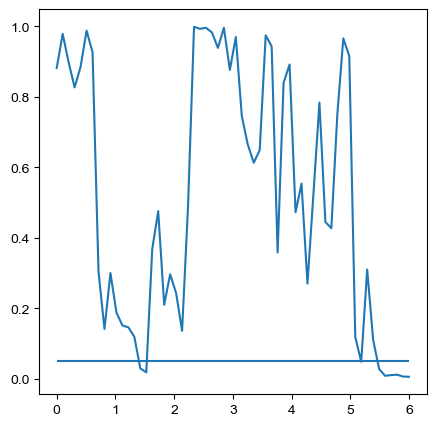

In [270]:
xAxis = np.linspace(0,6,dataN)

plt.plot(xAxis,realP)
plt.hlines(0.05,0,6,)

## one sample test

In [271]:
def oneSampTTest(data, **kwargs):

    return stats.ttest_1samp(data,**kwargs) #t,p

def rmAnovaTest(data,dataN, level,**kwargs): 
    #dataN is the number of columns to ran the test on, this is needed because usually the last few columns are labels
    #level decides which variable's f and p value to get
    return np.array([pg.rm_anova(data = data, dv = i,**kwargs)[['F','p-unc']].iloc[level,:] for i in data.columns[:dataN].values])

def permutationFunction(test,**kwargs):
    testFunctions = {
        'oneSampleTTest': oneSampTTest,
        'rmAnovaTest': rmAnovaTest
    }
    if test in testFunctions:
        return testFunctions[test](**kwargs)
    else:
        raise ValueError(f"Invalid test type: {test}")
    
def runPerm(testType,perms,data,dataN,permLevel,**kwargs):
        fCluster = np.zeros(perms)   
        
        for n in range(perms):
                print(n)
                try:
                        # shuffle condition label
                        data['randLabel'] = np.random.permutation(data[permLevel].values)

                        # calcualte the permutated statistic (e.g. F values, t values) and p values
                        statArr,pArr = permutationFunction(testType,data = data.iloc[:,:dataN],**kwargs)
                        
                        # find the clusters that exceed p value threshold
                        consGroups = consecutive(np.where(pArr < 0.05)[0], stepsize=1,findSame = False)

                        # find the cluster with the largest length,then find its corresponding t values, sum it up
                                #note: if no cluster is found, this will return 0
                        fCluster[n] =  np.round(statArr[consGroups[np.argmax(np.array([len(t) for t in consGroups]))]].sum(),3)

                except ZeroDivisionError:
                        print(f"⚠️ calculation encountered for {i}. Skipping.")
        return fCluster

In [272]:
perms = 5000
fCluster = np.zeros((3,perms))
loadRaw = False

In [273]:
if loadRaw:
    for labelCnt,label in enumerate(['verbalverbal','verbalvisual','visualvisual']):
        dataThis = semanticCorr[semanticCorr.comparison == label]
        for n in range(perms):
            print(n)
            try:
                # for each time point, 2 way anova with blk reliability and cued item as dv, and the data as dv
                # get the f score for the interaction effect
                statArr,pArr = oneSampTTest(dataThis.iloc[:,:dataN]* np.random.choice([1, -1], size=(41, 1)),popmean=0,axis=0, nan_policy='propagate')

                
                # find the clusters that exceed p value threshold
                consGroups = consecutive(np.where(pArr < 0.05)[0], stepsize=1,findSame = False)
                # find the clusters that exceed p value threshold
                                

                # find the cluster with the largest length,then find its corresponding t values, sum it up
                        #note: if no cluster is found, this will return 0
                fCluster[labelCnt,n] =  np.round(statArr[consGroups[np.argmax(np.array([len(t) for t in consGroups]))]].sum(),3)

            except ZeroDivisionError:
                    print(f"⚠️ ZeroDivisionError encountered for {i}. Skipping.")


else:
    fCluster_retrocue = np.load('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/fCluster_retrocue_oneSampTTest.npy')
    fCluster_precue = np.load('Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/fCluster_precue_oneSampTTest.npy')

In [274]:
semanticCorr_precue = corrDf_ds_precue[corrDf_ds_precue.mRDV == 'verbal']
semanticCorr_precue['comparison'] = semanticCorr_precue.current + semanticCorr_precue.target

semanticCorr_retrocue = corrDf_ds_retrocue[corrDf_ds_retrocue.mRDV == 'verbal']
semanticCorr_retrocue['comparison'] = semanticCorr_retrocue.current + semanticCorr_retrocue.target

verver has 4 clusters, clusters with p value [0.0, 0.0292, 0.0308, 0.2568], the clusters are 
 [array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34], dtype=int64), array([43, 44, 45, 46, 47, 48, 49], dtype=int64), array([51, 52, 53, 54, 55, 56, 57], dtype=int64), array([59], dtype=int64)]
vervis has 3clusters, clusters with p value [0.0, 0.2218, 0.015], the clusters are 
 [array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35], dtype=int64), array([46], dtype=int64), array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)]
visvis has 2clusters, clusters with p value [0.0, 0.0436], the clusters are 
 [array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64), array([54, 55, 56, 57, 58, 59], dtype=int64)]


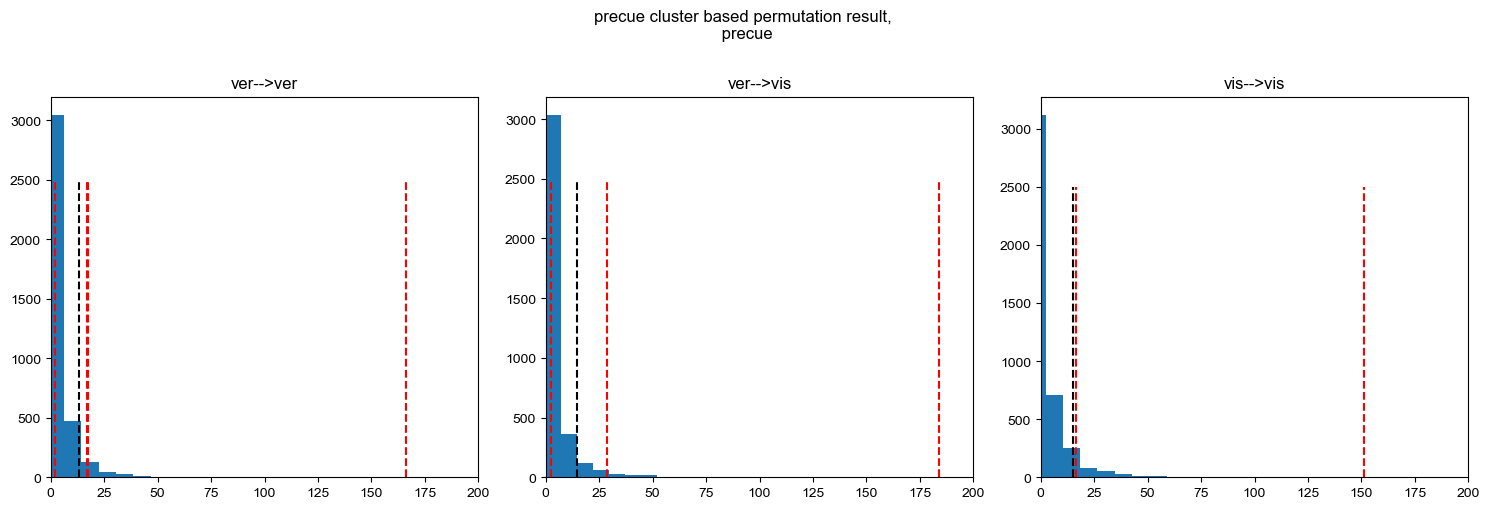

In [275]:
fs(15,5)
fig,ax = plt.subplots(ncols = 3)
dataN = 60
dataThis = semanticCorr_precue[semanticCorr_precue.comparison == 'verbalverbal']
realT,realP = oneSampTTest(dataThis.iloc[:,:dataN],popmean=0,axis=0, nan_policy='propagate')
consGroups_precue_verver = consecutive(np.where(realP <= 0.05)[0], stepsize=1,
                        findSame = False)
fsum_precue_verver = [realT[i].sum() for i in consGroups_precue_verver]
pValue_precue_verver = [sum(fCluster_precue[0] > i)/perms for i in fsum_precue_verver]
print(f'verver has {len(fsum_precue_verver)} clusters, clusters with p value {pValue_precue_verver}, the clusters are \n {consGroups_precue_verver}',)

ax[0].hist(fCluster_precue[0],bins = 20)
ax[0].vlines([fsum_precue_verver],0,perms/2,linestyles = 'dashed',color ='r')
ax[0].vlines(np.percentile(fCluster_precue[0],95),0,perms/2,linestyles = 'dashed',color ='black')
ax[0].set_xlim(0,200)

dataThis = semanticCorr_precue[semanticCorr_precue.comparison == 'verbalvisual']
realT,realP = oneSampTTest(dataThis.iloc[:,:dataN],popmean=0,axis=0, nan_policy='propagate')
consGroups_precue_vervis = consecutive(np.where(realP <= 0.05)[0], stepsize=1,
                        findSame = False)
fsum_precue_vervis = [realT[i].sum() for i in consGroups_precue_vervis]
pValue_precue_vervis = [sum(fCluster_precue[1] > i)/perms for i in fsum_precue_vervis]
print(f'vervis has {len(fsum_precue_vervis)}clusters, clusters with p value {pValue_precue_vervis}, the clusters are \n {consGroups_precue_vervis}',)

ax[1].hist(fCluster_precue[1],bins = 20)
ax[1].vlines([fsum_precue_vervis],0,perms/2,linestyles = 'dashed',color ='r')
ax[1].vlines(np.percentile(fCluster_precue[1],95),0,perms/2,linestyles = 'dashed',color ='black')
ax[1].set_xlim(0,200)


dataThis = semanticCorr_precue[semanticCorr_precue.comparison == 'visualvisual']
realT,realP = oneSampTTest(dataThis.iloc[:,:dataN],popmean=0,axis=0, nan_policy='propagate')
consGroups_precue_visvis = consecutive(np.where(realP <= 0.05)[0], stepsize=1,
                        findSame = False)
fsum_precue_visvis = [realT[i].sum() for i in consGroups_precue_visvis]
pValue_precue_visvis = [sum(fCluster_precue[2] > i)/perms for i in fsum_precue_visvis]
print(f'visvis has {len(fsum_precue_visvis)}clusters, clusters with p value {pValue_precue_visvis}, the clusters are \n {consGroups_precue_visvis}',)

ax[2].hist(fCluster_precue[2],bins = 20)
ax[2].vlines([fsum_precue_visvis],0,perms/2,linestyles = 'dashed',color ='r')
ax[2].vlines(np.percentile(fCluster_precue[2],95),0,perms/2,linestyles = 'dashed',color ='black')
ax[2].set_xlim(0,200)


ax[0].set_title('ver-->ver')
ax[1].set_title('ver-->vis')
ax[2].set_title('vis-->vis')

plt.suptitle('precue cluster based permutation result, \n precue', y = 1.01)
plt.tight_layout()

verver has 1 clusters, clusters with p value [0.0], the clusters are 
 [array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
      dtype=int64)]
vervis has 2clusters, clusters with p value [0.0, 0.061], the clusters are 
 [array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
      dtype=int64), array([55, 56, 57, 58, 59], dtype=int64)]
visvis has 2clusters, clusters with p value [0.0, 0.0182], the clusters are 
 [array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
      dtype=int64), array([53, 54, 55, 56, 57, 58, 59], dtype=int64)]


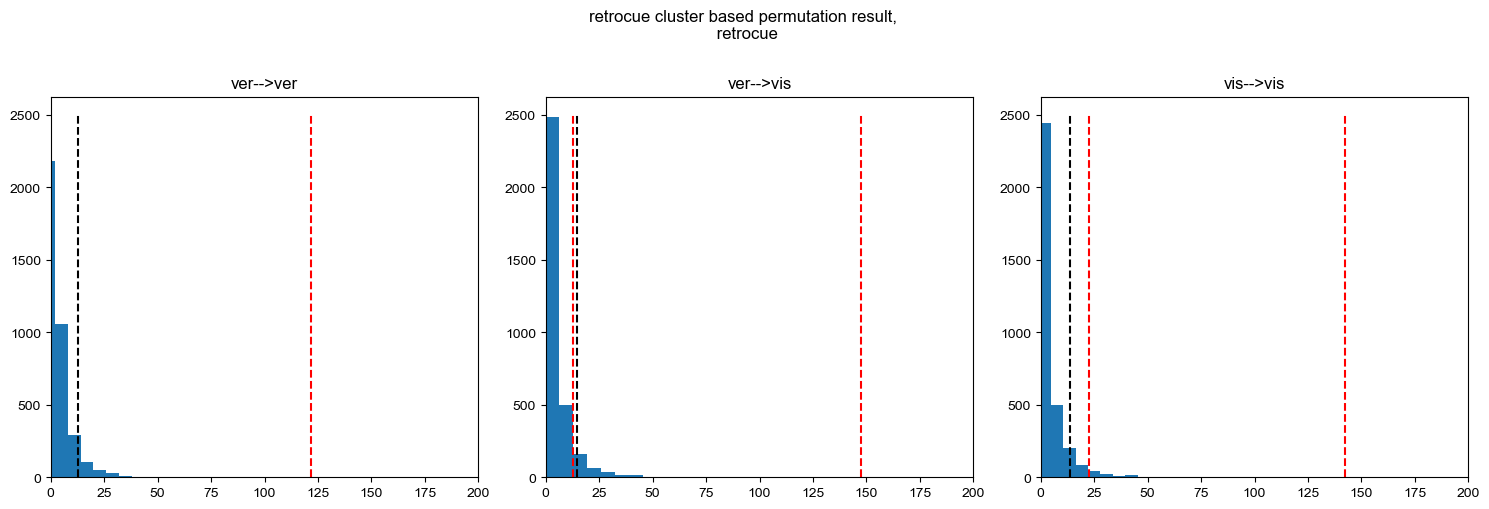

In [276]:
fs(15,5)
fig,ax = plt.subplots(ncols = 3)
dataN = 60
dataThis = semanticCorr_retrocue[semanticCorr_retrocue.comparison == 'verbalverbal']
realT,realP = oneSampTTest(dataThis.iloc[:,:dataN],popmean=0,axis=0, nan_policy='propagate')
consGroups_retrocue_verver = consecutive(np.where(realP <= 0.05)[0], stepsize=1,
                        findSame = False)
fsum_retrocue_verver = [realT[i].sum() for i in consGroups_retrocue_verver]
pValue_retrocue_verver = [sum(fCluster_retrocue[0] > i)/perms for i in fsum_retrocue_verver]
print(f'verver has {len(fsum_retrocue_verver)} clusters, clusters with p value {pValue_retrocue_verver}, the clusters are \n {consGroups_retrocue_verver}',)

ax[0].hist(fCluster_retrocue[0],bins = 20)
ax[0].vlines([fsum_retrocue_verver],0,perms/2,linestyles = 'dashed',color ='r')
ax[0].vlines(np.percentile(fCluster_retrocue[0],95),0,perms/2,linestyles = 'dashed',color ='black')
ax[0].set_xlim(0,200)

dataThis = semanticCorr_retrocue[semanticCorr_retrocue.comparison == 'verbalvisual']
realT,realP = oneSampTTest(dataThis.iloc[:,:dataN],popmean=0,axis=0, nan_policy='propagate')
consGroups_retrocue_vervis = consecutive(np.where(realP <= 0.05)[0], stepsize=1,
                        findSame = False)
fsum_retrocue_vervis = [realT[i].sum() for i in consGroups_retrocue_vervis]
pValue_retrocue_vervis = [sum(fCluster_retrocue[1] > i)/perms for i in fsum_retrocue_vervis]
print(f'vervis has {len(fsum_retrocue_vervis)}clusters, clusters with p value {pValue_retrocue_vervis}, the clusters are \n {consGroups_retrocue_vervis}',)

ax[1].hist(fCluster_retrocue[1],bins = 20)
ax[1].vlines([fsum_retrocue_vervis],0,perms/2,linestyles = 'dashed',color ='r')
ax[1].vlines(np.percentile(fCluster_retrocue[1],95),0,perms/2,linestyles = 'dashed',color ='black')
ax[1].set_xlim(0,200)


dataThis = semanticCorr_retrocue[semanticCorr_retrocue.comparison == 'visualvisual']
realT,realP = oneSampTTest(dataThis.iloc[:,:dataN],popmean=0,axis=0, nan_policy='propagate')
consGroups_retrocue_visvis = consecutive(np.where(realP <= 0.05)[0], stepsize=1,
                        findSame = False)
fsum_retrocue_visvis = [realT[i].sum() for i in consGroups_retrocue_visvis]
pValue_retrocue_visvis = [sum(fCluster_retrocue[2] > i)/perms for i in fsum_retrocue_visvis]
print(f'visvis has {len(fsum_retrocue_visvis)}clusters, clusters with p value {pValue_retrocue_visvis}, the clusters are \n {consGroups_retrocue_visvis}',)

ax[2].hist(fCluster_retrocue[2],bins = 20)
ax[2].vlines([fsum_retrocue_visvis],0,perms/2,linestyles = 'dashed',color ='r')
ax[2].vlines(np.percentile(fCluster_retrocue[2],95),0,perms/2,linestyles = 'dashed',color ='black')
ax[2].set_xlim(0,200)


ax[0].set_title('ver-->ver')
ax[1].set_title('ver-->vis')
ax[2].set_title('vis-->vis')

plt.suptitle('retrocue cluster based permutation result, \n retrocue', y = 1.01)
plt.tight_layout()

# adding permutation results to the plot

In [277]:
corrDf_retrocue = pd.DataFrame()
corrDf_precue = pd.DataFrame()

for i in glob.glob(f'Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_311to352.csv'):
    
    thisDf = pd.read_csv(i).iloc[:,1:]
    corrDf_precue = pd.concat([corrDf_precue,thisDf])

for i in glob.glob(f'Z:/yueying/gazeObject_YueyingDong/results/gRSA_euc/rsaByCondition/corrVal/corrVal_360to400.csv'):
    
    thisDf = pd.read_csv(i).iloc[:,1:]
    corrDf_retrocue = pd.concat([corrDf_retrocue,thisDf])
    

In [278]:
corrDfMean_precue = corrDf_precue.groupby(['mRDV','current','target']).mean(numeric_only=True)
corrDfsem_precue = corrDf_precue.groupby(['mRDV','current','target']).sem(numeric_only=True)

corrDfMean_retrocue = corrDf_retrocue.groupby(['mRDV','current','target']).mean(numeric_only=True)
corrDfsem_retrocue = corrDf_retrocue.groupby(['mRDV','current','target']).sem(numeric_only=True)


In [296]:
labelArr = ['ver --> ver','ver --> vis','vis --> vis']
retrocueT = [0.5,1.5,2,2.5,3,6]
precueT = [0.5,1.5,2.5,3,6]
cList = ['#9d76af',"#999999",'#66a99f']
dataN = 600

In [282]:
np.array(consGroups_precue_verver,dtype=object)[np.array(pValue_precue_verver)<=0.05]

array([array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
              34], dtype=int64)                                                  ,
       array([43, 44, 45, 46, 47, 48, 49], dtype=int64),
       array([51, 52, 53, 54, 55, 56, 57], dtype=int64)], dtype=object)

In [283]:
precueververCluster = np.array([np.array([i[0],i[-1]])*100/1000 - 0.5 for i in consGroups_precue_verver])[np.array(pValue_precue_verver)<=0.05]
precuevervisCluster = np.array([np.array([i[0],i[-1]])*100/1000 - 0.5 for i in consGroups_precue_vervis])[np.array(pValue_precue_vervis)<=0.05]
precuevisvisCluster = np.array([np.array([i[0],i[-1]])*100/1000 - 0.5 for i in consGroups_precue_visvis])[np.array(pValue_precue_visvis)<=0.05]

retrocueververCluster = np.array([np.array([i[0],i[-1]])*100/1000 - 0.5 for i in consGroups_retrocue_verver])[np.array(pValue_retrocue_verver)<=0.05]
retrocuevervisCluster = np.array([np.array([i[0],i[-1]])*100/1000 - 0.5 for i in consGroups_retrocue_vervis])[np.array(pValue_retrocue_vervis)<=0.05]
retrocuevisvisCluster = np.array([np.array([i[0],i[-1]])*100/1000 - 0.5 for i in consGroups_retrocue_visvis])[np.array(pValue_retrocue_visvis)<=0.05]

In [284]:
precuevisvisCluster,precueververCluster,precuevervisCluster, 

(array([[1.2, 3. ],
        [4.9, 5.4]]),
 array([[1.2, 2.9],
        [3.8, 4.4],
        [4.6, 5.2]]),
 array([[0.9, 3. ],
        [4.4, 5.4]]))

In [285]:
print(
    np.array(pValue_precue_visvis)[np.array(pValue_precue_visvis)<=0.05],
    np.array(pValue_precue_verver)[np.array(pValue_precue_verver)<=0.05],
    np.array(pValue_precue_vervis)[np.array(pValue_precue_vervis)<=0.05])

[0.     0.0436] [0.     0.0292 0.0308] [0.    0.015]


In [286]:
retrocuevisvisCluster, retrocueververCluster,retrocuevervisCluster

(array([[0.2, 1.7],
        [4.8, 5.4]]),
 array([[0.2, 1.6]]),
 array([[0.2, 1.7]]))

In [287]:
print(np.array(pValue_retrocue_visvis)[np.array(pValue_retrocue_visvis)<=0.05],
    np.array(pValue_retrocue_verver)[np.array(pValue_retrocue_verver)<=0.05],
    
    np.array(pValue_retrocue_vervis)[np.array(pValue_retrocue_vervis)<=0.05])

[0.     0.0182] [0.] [0.]


In [288]:
retrocueCondCluster = np.array([np.array([i[0],i[-1]])*100/1000 - 0.5 for i in consGroups_retrocueCond])[np.array(pValue_retrocueCond)<=0.05]


In [289]:
precueT

[0.5, 1.5, 2.5, 3, 6]

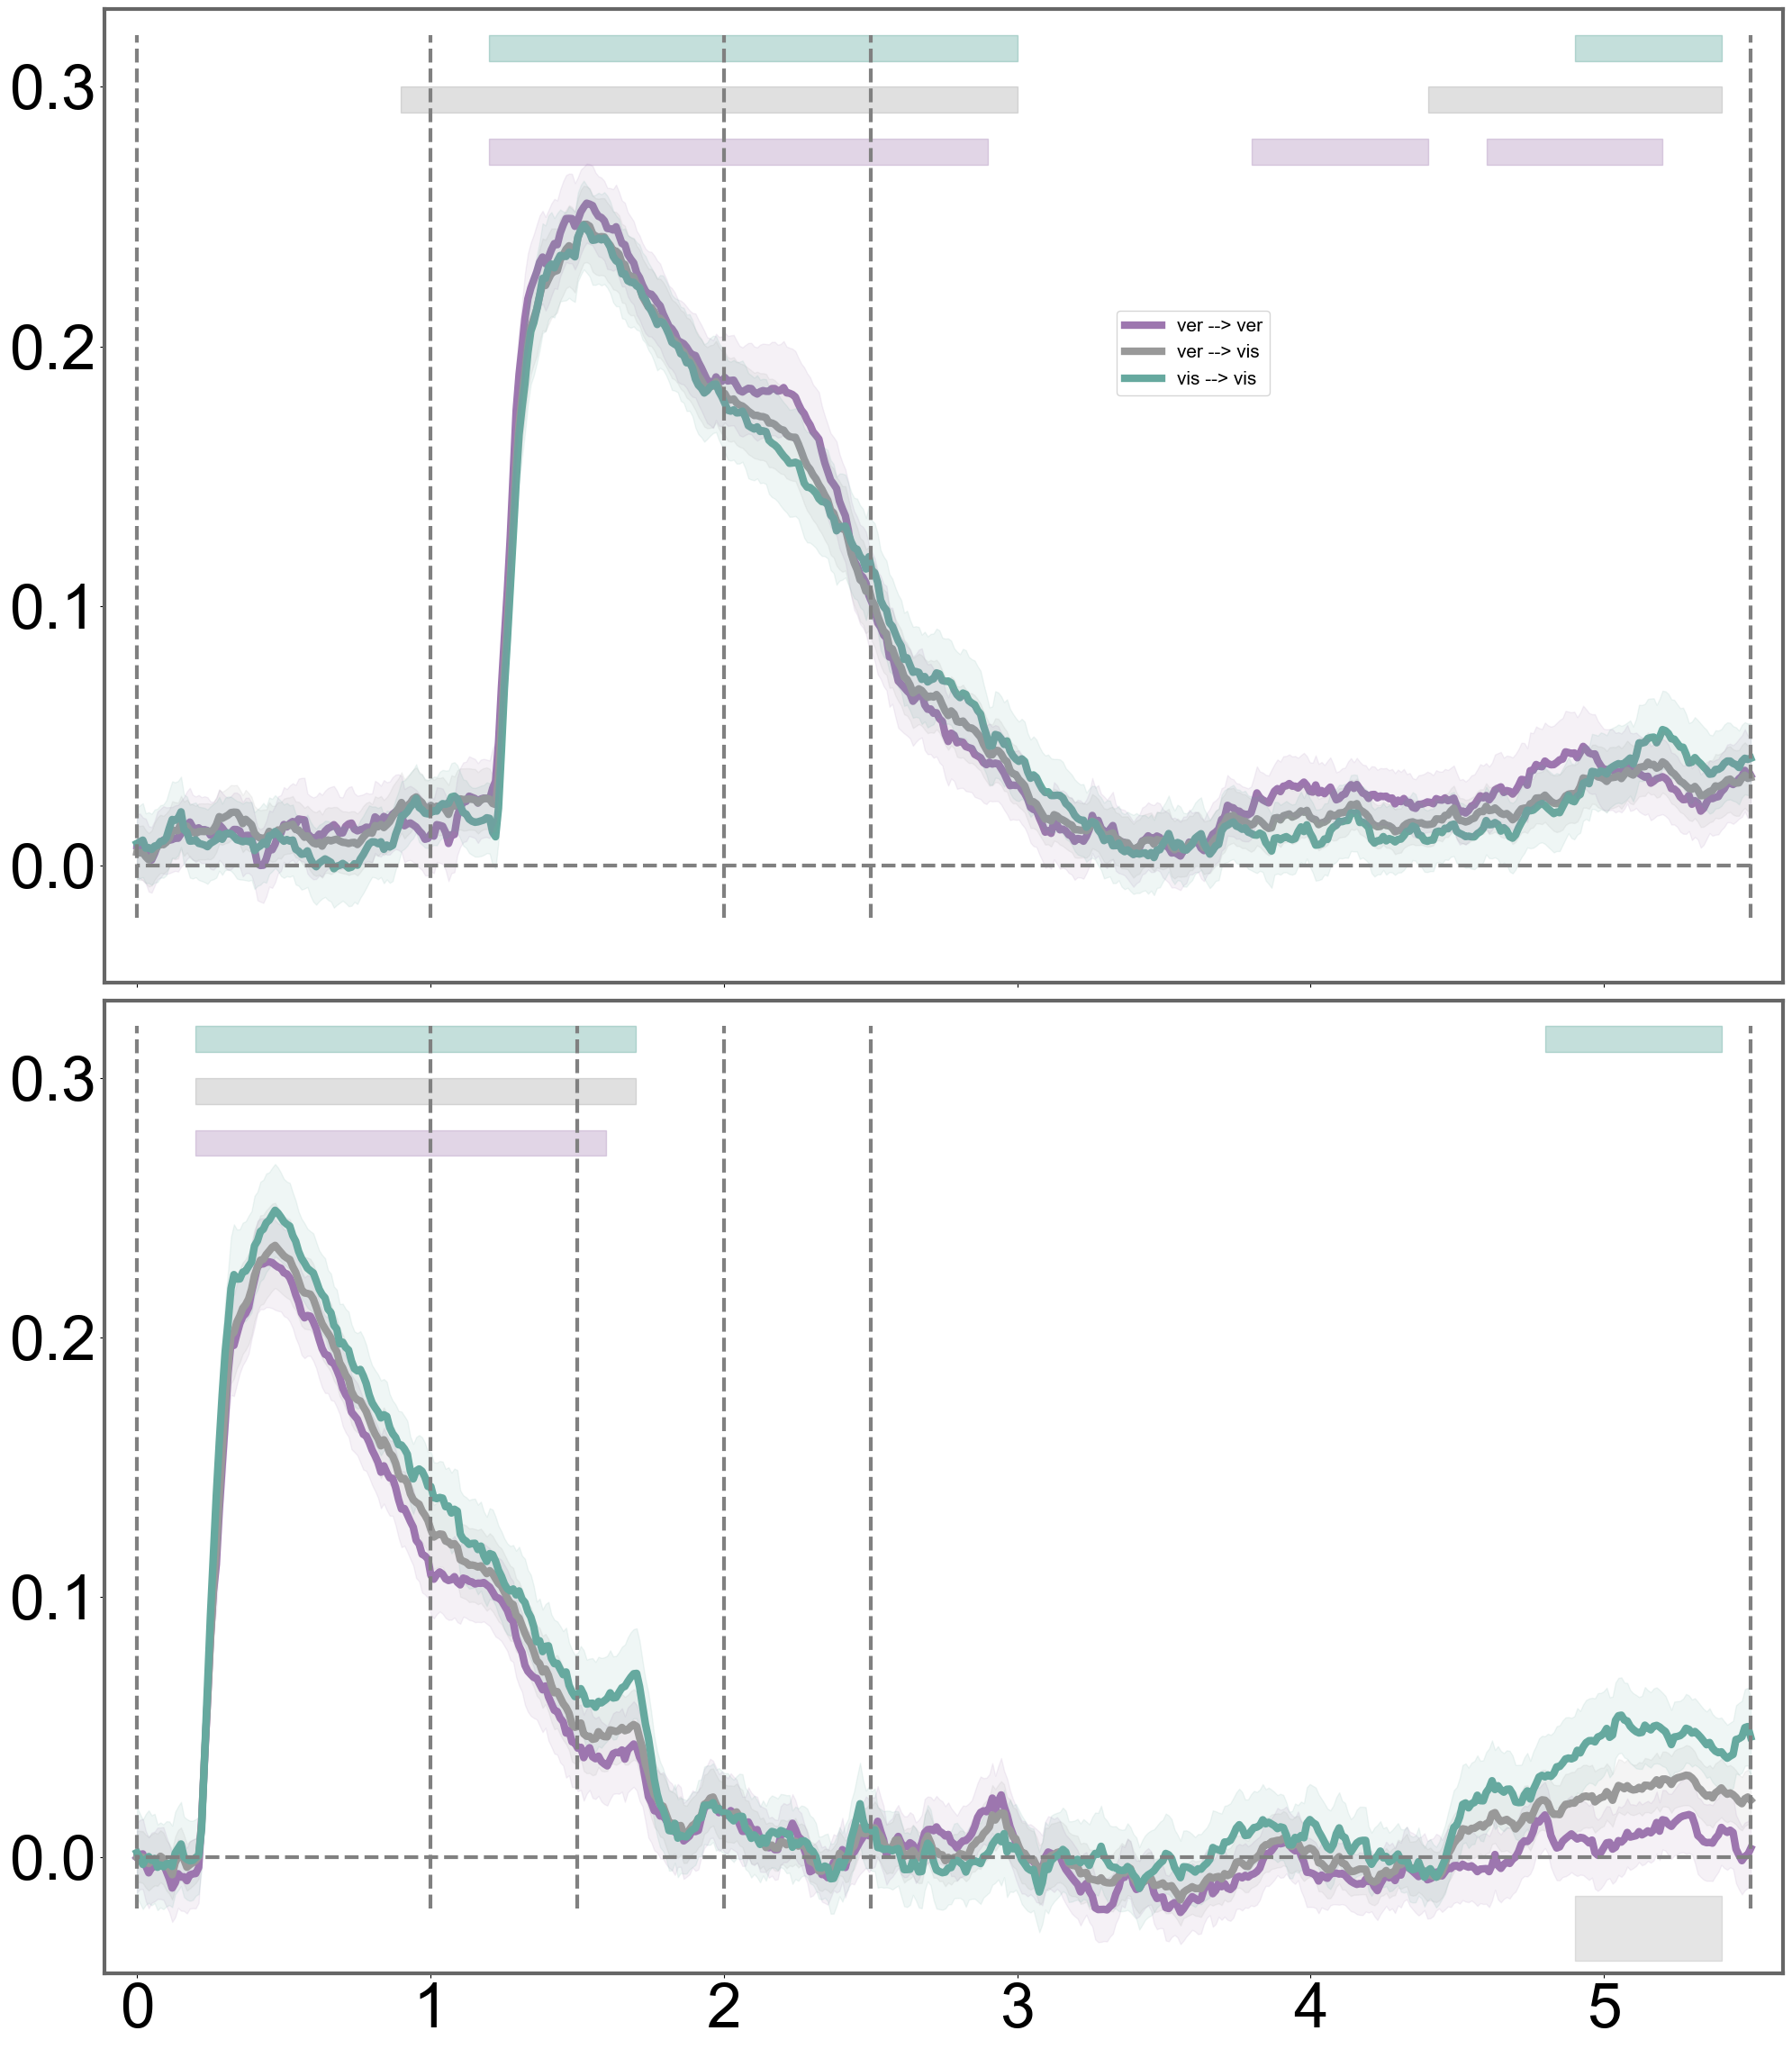

In [330]:
dataN = 600
fig,ax = plt.subplots(nrows = 2,figsize = (20,23),sharex=True,sharey=True)
xAxis = np.linspace(0,5.5,dataN-50)

[ax[0].fill_between(i,0.26+0.01,0.27+0.01,color = "#9d76af",alpha = 0.3) for i in precueververCluster]
[ax[0].fill_between(i,0.28+0.01,0.29+0.01,color = '#666666',alpha = 0.2) for i in precuevervisCluster]
[ax[0].fill_between(i,0.30+0.01,0.31+0.01,color = "#3d9688",alpha = 0.3) for i in precuevisvisCluster]

[ax[1].fill_between(i,0.26+0.01,0.27+0.01,color = "#9d76af",alpha = 0.3) for i in retrocueververCluster]
[ax[1].fill_between(i,0.28+0.01,0.29+0.01,color = '#666666',alpha = 0.2) for i in retrocuevervisCluster]
[ax[1].fill_between(i,0.30+0.01,0.31+0.01,color = "#3d9688",alpha = 0.3) for i in retrocuevisvisCluster]

[ax[1].fill_between(i,-0.04,-0.015,color = 'grey',alpha = 0.2,zorder = 1) for i in retrocueCondCluster]

[ax[1].plot(xAxis,corrDfMean_retrocue.iloc[i,50:dataN].values,
            label = labelArr[i],c = cList[i],linewidth = 6) for i in [0,1,2]]

[ax[0].plot(xAxis,corrDfMean_precue.iloc[i,50:dataN].values,
            label = labelArr[i],c = cList[i],linewidth = 6,zorder = 0) for i in [0,1,2]] #range(3)

[ax[1].fill_between(xAxis,corrDfMean_retrocue.iloc[i,50:dataN].values + corrDfsem_retrocue.iloc[i,50:dataN].values,
                    corrDfMean_retrocue.iloc[i,50:dataN].values - corrDfsem_retrocue.iloc[i,50:dataN].values,
                    alpha = 0.1,color = cList[i]) for i in [0,1,2]]

[ax[0].fill_between(xAxis,corrDfMean_precue.iloc[i,50:dataN].values + corrDfsem_precue.iloc[i,50:dataN].values,
                    corrDfMean_precue.iloc[i,50:dataN].values - corrDfsem_precue.iloc[i,50:dataN].values,
                    alpha = 0.1,color = cList[i]) for i in [0,1,2]]



ax[0].vlines(np.array(precueT) - 0.5,-0.02,0.32,colors = 'grey',linestyles = 'dashed',linewidth = 3)
ax[1].vlines(np.array(retrocueT) - 0.5,-0.02,0.32,colors = 'grey',linestyles = 'dashed',linewidth = 3)
ax[0].hlines(0,5.5,0,colors = 'grey',linestyles = 'dashed',linewidth = 3)
ax[1].hlines(0,5.5,0,colors = 'grey',linestyles = 'dashed',linewidth = 3)

ax[0].legend(fontsize = 15,bbox_to_anchor = (0.7,0.7))
ax[0].set_title('')
ax[1].set_title('')
plt.suptitle('',fontsize = 15)

ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.1))

ax[1].tick_params(labelsize=50)
ax[0].tick_params(labelsize=50)
ax[0].set_ylim(-0.045,0.33)

ax[0].spines['left'].set_color('#666666')
ax[0].spines['bottom'].set_color('#666666')
ax[0].spines['right'].set_color('#666666')
ax[0].spines['top'].set_color('#666666')
ax[0].spines['left'].set_linewidth(3)
ax[0].spines['bottom'].set_linewidth(3)
ax[0].spines['right'].set_linewidth(3)
ax[0].spines['top'].set_linewidth(3)

ax[1].spines['left'].set_color('#666666')
ax[1].spines['bottom'].set_color('#666666')
ax[1].spines['right'].set_color('#666666')
ax[1].spines['top'].set_color('#666666')
ax[1].spines['left'].set_linewidth(3)
ax[1].spines['bottom'].set_linewidth(3)
ax[1].spines['right'].set_linewidth(3)
ax[1].spines['top'].set_linewidth(3)
ax[0]. margins(x=0.02)

fig.tight_layout()